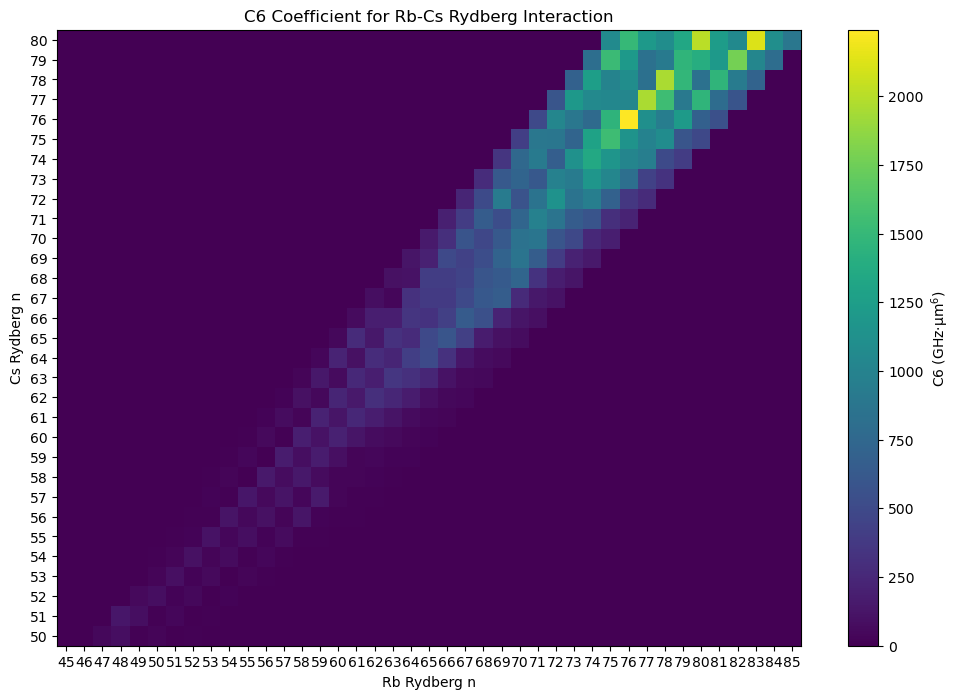

In [8]:
# plot a 2D heat map of C6 values for Rb-Cs interaction from the data files
import numpy as np
import matplotlib.pyplot as plt
import datetime

# Load the data from the previously saved files
# file name: C6_RbCs_data_20260114_161619.txt
data_file = 'C6_RbCs_data_20260114_161619.txt'
Cs_states = []
Rb_states = []
C6_RbCs_values = []

with open(data_file, 'r') as f:
    lines = f.readlines()[1:]  # Skip header line
    for line in lines:
        parts = line.strip().split(',')
        Cs_states.append(int(parts[0]))
        Rb_states.append(int(parts[1]))
        C6_RbCs_values.append(float(parts[2]))

Cs_states = np.array(Cs_states)
Rb_states = np.array(Rb_states)
C6_RbCs_values = np.array(C6_RbCs_values)

# Reshape the data for heatmap plotting
unique_Cs_states = np.unique(Cs_states)
unique_Rb_states = np.unique(Rb_states)
C6_matrix_RbCs = np.zeros((len(unique_Cs_states), len(unique_Rb_states)))
for i, cs in enumerate(unique_Cs_states):
    for j, rb in enumerate(unique_Rb_states):
        mask = (Cs_states == cs) & (Rb_states == rb)
        if np.any(mask):
            C6_matrix_RbCs[i, j] = C6_RbCs_values[mask][0]

# Plot the heatmap
plt.figure(figsize=(12, 8))
plt.imshow(C6_matrix_RbCs, origin='lower',
           extent=[unique_Rb_states[0]-0.5, unique_Rb_states[-1]+0.5, unique_Cs_states[0]-0.5, unique_Cs_states[-1]+0.5],
           aspect='auto', cmap='viridis')
plt.colorbar(label='C6 (GHz·μm$^6$)')
plt.xlabel('Rb Rydberg n')
plt.ylabel('Cs Rydberg n')
plt.title('C6 Coefficient for Rb-Cs Rydberg Interaction')
plt.xticks(unique_Rb_states)
plt.yticks(unique_Cs_states)
plt.grid(False)
plt.show()

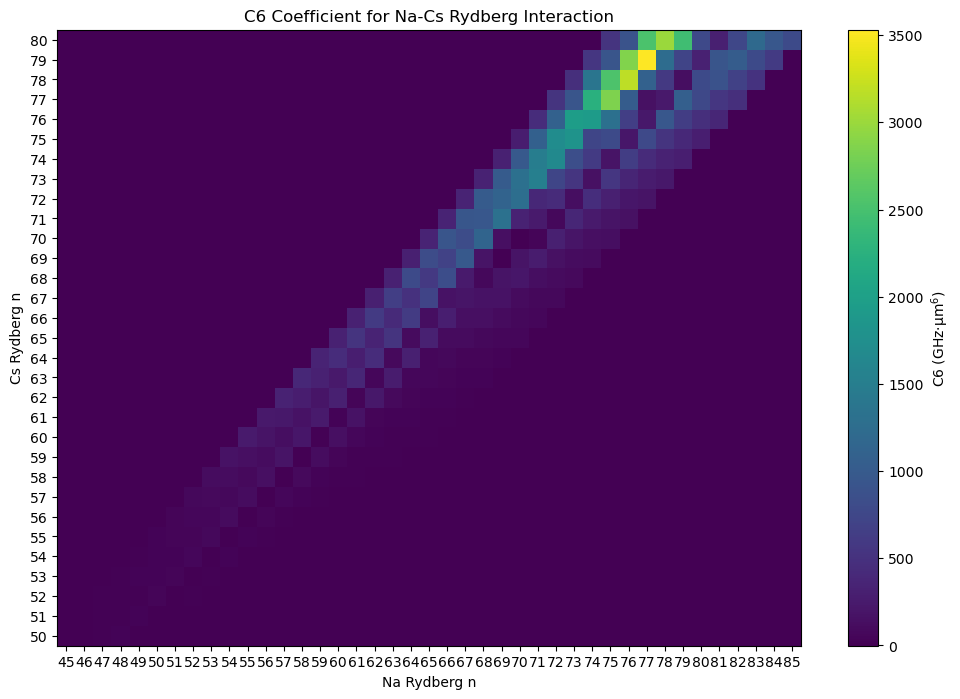

In [9]:
# do exactly the same for Na-Cs interaction from the data file
# file name: C6_NaCs_data_20260114_161619.txt
data_file = 'C6_NaCs_data_20260114_161619.txt'
Cs_states = []
Na_states = []
C6_NaCs_values = []

with open(data_file, 'r') as f:
    lines = f.readlines()[1:]  # Skip header line
    for line in lines:
        parts = line.strip().split(',')
        Cs_states.append(int(parts[0]))
        Na_states.append(int(parts[1]))
        C6_NaCs_values.append(float(parts[2]))
Cs_states = np.array(Cs_states)
Na_states = np.array(Na_states)
C6_NaCs_values = np.array(C6_NaCs_values)

# Reshape the data for heatmap plotting
unique_Cs_states = np.unique(Cs_states)
unique_Na_states = np.unique(Na_states)
C6_matrix_NaCs = np.zeros((len(unique_Cs_states), len(unique_Na_states)))
for i, cs in enumerate(unique_Cs_states):
    for j, na in enumerate(unique_Na_states):
        mask = (Cs_states == cs) & (Na_states == na)
        if np.any(mask):
            C6_matrix_NaCs[i, j] = C6_NaCs_values[mask][0]

# Plot the heatmap
plt.figure(figsize=(12, 8))
plt.imshow(C6_matrix_NaCs, origin='lower',
           extent=[unique_Na_states[0]-0.5, unique_Na_states[-1]+0.5, unique_Cs_states[0]-0.5, unique_Cs_states[-1]+0.5],
           aspect='auto', cmap='viridis')
plt.colorbar(label='C6 (GHz·μm$^6$)')
plt.xlabel('Na Rydberg n')
plt.ylabel('Cs Rydberg n')
plt.title('C6 Coefficient for Na-Cs Rydberg Interaction')
plt.xticks(unique_Na_states)
plt.yticks(unique_Cs_states)
plt.grid(False)
plt.show()

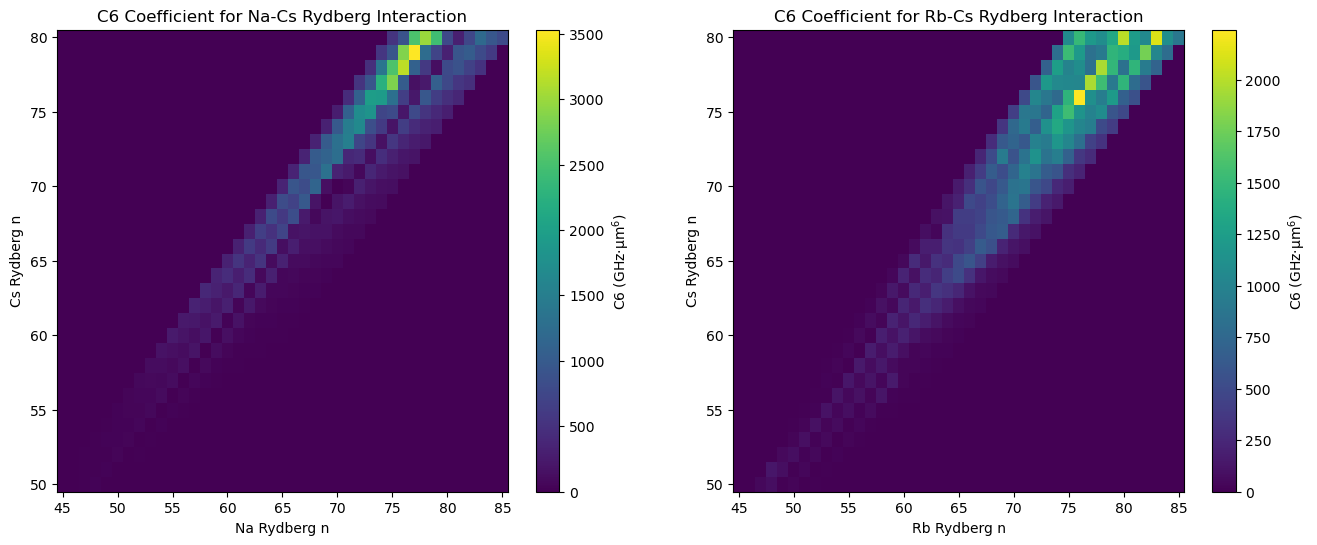

In [11]:
# plot the two plots above side by side for comparison
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.imshow(C6_matrix_NaCs, origin='lower',
           extent=[unique_Na_states[0]-0.5, unique_Na_states[-1]+0.5, unique_Cs_states[0]-0.5, unique_Cs_states[-1]+0.5],
           aspect='auto', cmap='viridis')
plt.colorbar(label='C6 (GHz·μm$^6$)')
plt.xlabel('Na Rydberg n')
plt.ylabel('Cs Rydberg n')
plt.title('C6 Coefficient for Na-Cs Rydberg Interaction')
# set x and y ticks to only count by 5s
plt.xticks(np.arange(unique_Na_states[0], unique_Na_states[-1]+1, 5))
plt.yticks(np.arange(unique_Cs_states[0], unique_Cs_states[-1]+1, 5))
plt.grid(False)
plt.subplot(1, 2, 2)
plt.imshow(C6_matrix_RbCs, origin='lower',
           extent=[unique_Rb_states[0]-0.5, unique_Rb_states[-1]+0.5, unique_Cs_states[0]-0.5, unique_Cs_states[-1]+0.5],
           aspect='auto', cmap='viridis')
plt.colorbar(label='C6 (GHz·μm$^6$)')
plt.xlabel('Rb Rydberg n')
plt.ylabel('Cs Rydberg n')
plt.title('C6 Coefficient for Rb-Cs Rydberg Interaction')
# set x and y ticks to only count by 5s
plt.xticks(np.arange(unique_Rb_states[0], unique_Rb_states[-1]+1, 5))
plt.yticks(np.arange(unique_Cs_states[0], unique_Cs_states[-1]+1, 5))
plt.grid(False)
plt.show()